## Import statements and other preliminary code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


### Read CSV file from Google Drive

In [4]:
df = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')

In [5]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Statistical investigation of the data

### Brief descriptive statistics

In [ ]:
#Includes information for all columns (both numerical and categorical).
df.describe(include = "all")

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,141232,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2016-03-10,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,10838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,NaN,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,NaN,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,NaN,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,NaN,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,NaN,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


### Drop rows or columns with >70% of its values missing (change is made to df)

In [ ]:
#Columns or rows should only be dropped if >70% of it is empty or missing. 
threshold = 0.7

#Dropping columns with missing value rate higher than threshold
df = df[df.columns[df.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
df = df.loc[df.isnull().mean(axis=1) < threshold]

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Remove any records for which we have no outcome attribute value

In [ ]:
df = df.dropna(how = 'any', subset = ['RainTomorrow'])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


### Filling missing values with median/mean; generate new datasets; detect possible outliers and remove them (this can be done after loading from drive below)

In [11]:
#Information on sections of each column that are null. 
print(df.isnull().sum())

Date                 0
Latitude             0
Longitude            0
MinTemp            481
MaxTemp            265
Rainfall          1354
Evaporation      60682
Sunshine         67659
WindGustDir       9187
WindGustSpeed     9127
WindDir9am        9852
WindDir3pm        3617
WindSpeed9am      1187
WindSpeed3pm      2469
Humidity9am       1613
Humidity3pm       3449
Pressure9am      13863
Pressure3pm      13830
Cloud9am         53496
Cloud3pm         56933
Temp9am            743
Temp3pm           2565
RainToday         1354
RainTomorrow         0
dtype: int64


#### Non-prediction Imputation Methods (this may suggest to us that prediction imputation methods are more sound)

In [12]:
#Fill missing categorical values with maximum occurred value. 
dfNonPredictionImputation = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

#Version one: fill missing numerical values with median.
dfNonPredictionImputationMedian = dfNonPredictionImputation.fillna(dfNonPredictionImputation.median())

#Version two: fill missing numerical values with mean.
dfNonPredictionImputationMean = dfNonPredictionImputation.fillna(dfNonPredictionImputation.median())

In [13]:
#Information on sections of each column that are null (dfNonPredictionMedian). 
print(dfNonPredictionImputationMedian.isnull().sum())

#Information on sections of each column that are null (dfNonPredictionMean). 
print(dfNonPredictionImputationMean.isnull().sum())

Date             0
Latitude         0
Longitude        0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64
Date             0
Latitude         0
Longitude        0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [14]:
dfNonPredictionImputationMedian

,Date,Latitude,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,335,-36.080477,146.916280,13.4,22.9,0.6,4.0,0.0,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No
1,336,-36.080477,146.916280,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,No,No
2,337,-36.080477,146.916280,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No
3,338,-36.080477,146.916280,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No,No
4,339,-36.080477,146.916280,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142027,171,-25.344857,131.032517,3.5,21.8,0.0,4.0,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,7.0,7.0,9.4,20.9,No,No
142028,172,-25.344857,131.032517,2.8,23.4,0.0,4.0,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,No,No
142029,173,-25.344857,131.032517,3.6,25.3,0.0,4.0,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,No,No
142030,174,-25.344857,131.032517,5.4,26.9,0.0,4.0,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,No,No


In [15]:
dfNonPredictionImputationMean

,Date,Latitude,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,335,-36.080477,146.916280,13.4,22.9,0.6,4.0,0.0,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No
1,336,-36.080477,146.916280,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,No,No
2,337,-36.080477,146.916280,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No
3,338,-36.080477,146.916280,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No,No
4,339,-36.080477,146.916280,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142027,171,-25.344857,131.032517,3.5,21.8,0.0,4.0,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,7.0,7.0,9.4,20.9,No,No
142028,172,-25.344857,131.032517,2.8,23.4,0.0,4.0,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,No,No
142029,173,-25.344857,131.032517,3.6,25.3,0.0,4.0,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,No,No
142030,174,-25.344857,131.032517,5.4,26.9,0.0,4.0,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,No,No


### Drop rows with at least one missing value; keep df unchanged and generate a separate dataframe for this: dfNoMissing

In [ ]:
#Dropping rows with at least one missing value. The outcome is a dataset with no missing values whatsoever. 
dfNoMissing = df.loc[df.isnull().mean(axis=1) < (1/23)]
dfNoMissing

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


### Data Visualizations

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

#Distributions with medians filled in for missing values.
dfNonPredictionMedian.hist(figsize=(25, 15))
plt.show()

In [ ]:
#Distributions with means filled in for missing values.
dfNonPredictionMean.hist(figsize=(25, 15))
plt.show()

In [ ]:
#Distributions on the original/unmodified dataset.
df.hist(figsize=(25, 15))
plt.show()

Based on the distributions above, clearly some attributes have outliers. Below, we will show the records that have such outlier values. The goal is to see whether an attribute's outlier values occurs *across* the record (i.e. if a value is a true outlier, other values in the record or observation are likely to be outliers as well).

In [ ]:
#Check all the observations that contain outliers.
from scipy import stats

numDfNoMissing = dfNoMissing.select_dtypes(include=["number"])
catDfNoMissing = dfNoMissing.select_dtypes(exclude=["number"])

numDfNoMissingNoOutliers = numDfNoMissing[(np.abs(stats.zscore(numDfNoMissing)) < 3).all(axis=1)]

In [ ]:
#Below are the outliers. Out of all the records that are complete, 2730 are outliers. 
pd.concat([numDfNoMissing,numDfNoMissingNoOutliers]).drop_duplicates(keep=False)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
6063,25.2,40.5,0.0,16.4,10.3,44.0,13.0,22.0,24.0,15.0,1012.4,1009.0,4.0,6.0,31.4,37.8
6065,18.4,31.8,0.0,16.0,12.9,33.0,17.0,15.0,25.0,5.0,1016.3,1013.8,0.0,1.0,19.9,30.3
6078,25.1,39.3,0.0,15.8,13.2,44.0,20.0,20.0,34.0,18.0,1013.8,1010.5,0.0,1.0,29.9,37.5
6079,25.2,38.5,0.0,16.2,13.1,44.0,24.0,20.0,35.0,18.0,1015.2,1011.9,1.0,2.0,29.0,36.9
6084,27.2,43.4,0.0,14.2,12.6,37.0,15.0,7.0,33.0,14.0,1005.9,1003.3,1.0,3.0,32.6,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142206,24.1,29.3,22.0,9.4,0.4,31.0,13.0,7.0,91.0,79.0,1011.5,1006.9,8.0,8.0,24.1,28.5
142209,24.9,31.9,20.0,4.0,4.8,28.0,7.0,13.0,88.0,69.0,1010.4,1006.8,7.0,7.0,27.6,30.3
142210,24.5,32.3,18.0,3.2,5.8,31.0,7.0,7.0,82.0,86.0,1009.5,1005.7,5.0,7.0,28.0,27.5
142211,24.0,30.4,17.0,5.8,0.8,31.0,11.0,4.0,89.0,87.0,1007.9,1006.0,7.0,8.0,26.7,27.7


The final analysis is to *not* remove the outliers. The above are true outliers. 

In [ ]:
print(dfNonPredictionMedian.isnull().sum())
dfNoMissing.hist(figsize=(25, 15))
plt.show()

NameError: ignored

## Data pre-processing

### Modifying date and location attributes for df (i.e. converting date to day of year and location to longitude and latitude)

In [ ]:
#Convert date into time of year.
df['Date'] = df['Date'].str[5:]
labelEncoder = preprocessing.LabelEncoder()

#Generate integer encodings because there is a natural ordinal relationship between the values.
df['Date'] = labelEncoder.fit_transform(df['Date'])
print(df['Date'])

0         335
1         336
2         337
3         338
4         339
         ... 
145454    171
145455    172
145456    173
145457    174
145458    175
Name: Date, Length: 142032, dtype: int64


In [ ]:
#Convert locations into latitude and longitude coordinates.

#Import and installation statements.
# !pip install geopy
from geopy.geocoders import Nominatim
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#Make a list containing unique locations.
uniqueLocations = df['Location'].unique().tolist()
locationsDict = {}

#Format locations correctly for correct input to geopy.
regex = re.compile('(?!^)(?=[A-Z])', re.MULTILINE)

geolocator = Nominatim()

#Add each location with its coordinates to locationsDict.
for locationKey in uniqueLocations:
  locationKeyModified = re.sub(regex, " ", locationKey)
  
  #Change PerthRAAF manually.
  if ("R A A F" in locationKeyModified):
    locationKeyModified = locationKeyModified[:locationKeyModified.find(" ")] + " RAAF"
  location = geolocator.geocode(locationKeyModified + ", Australia")
  locationsDict[locationKey] = (location.latitude, location.longitude)

latitudes = []
longitudes = []  

#Add coordinates to dataset columns.
for index, row in df.iterrows():
  latitudes.append(locationsDict[df['Location'][index]][0])
  longitudes.append(locationsDict[df['Location'][index]][1])

df.insert(1, "Latitude", latitudes) 
df.insert(2, "Longitude", longitudes) 
df = df.drop(columns = ['Location'])

df

,Date,Latitude,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,335,-36.080477,146.916280,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,336,-36.080477,146.916280,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,337,-36.080477,146.916280,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,338,-36.080477,146.916280,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,339,-36.080477,146.916280,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,171,-25.344857,131.032517,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,172,-25.344857,131.032517,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,173,-25.344857,131.032517,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,174,-25.344857,131.032517,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [ ]:
#Save dataset to Drive.
df.to_csv('/content/drive/MyDrive/weatherAUS2Missing.csv')

### Load df from drive

In [7]:
#Read dataset from Drive. 
df = pd.read_csv('/content/drive/MyDrive/weatherAUS2Missing.csv')


### Modifying date and location attributes for dfNoMissing (i.e. converting date to day of year and location to longitude and latitude)

In [ ]:
#Convert date into time of year.
dfNoMissing['Date'] = dfNoMissing['Date'].str[5:]
labelEncoder = preprocessing.LabelEncoder()

#Generate integer encodings because there is a natural ordinal relationship between the values.
dfNoMissing['Date'] = labelEncoder.fit_transform(dfNoMissing['Date'])
print(dfNoMissing['Date'])

6049        0
6050        1
6052        3
6053        4
6054        5
         ... 
142298    171
142299    172
142300    173
142301    174
142302    175
Name: Date, Length: 56420, dtype: int64


In [ ]:
#Make a list containing unique locations.
uniqueLocations = dfNoMissing['Location'].unique().tolist()
locationsDict = {}

#Format locations correctly for correct input to geopy.
regex = re.compile('(?!^)(?=[A-Z])', re.MULTILINE)

geolocator = Nominatim()

#Add each location with its coordinates to locationsDict.
for locationKey in uniqueLocations:
  locationKeyModified = re.sub(regex, " ", locationKey)
  
  #Change PerthRAAF manually.
  if ("R A A F" in locationKeyModified):
    locationKeyModified = locationKeyModified[:locationKeyModified.find(" ")] + " RAAF"
  location = geolocator.geocode(locationKeyModified + ", Australia")
  locationsDict[locationKey] = (location.latitude, location.longitude)

latitudes = []
longitudes = []  

#Add coordinates to dataset columns.
for index, row in dfNoMissing.iterrows():
  latitudes.append(locationsDict[dfNoMissing['Location'][index]][0])
  longitudes.append(locationsDict[dfNoMissing['Location'][index]][1])

dfNoMissing.insert(1, "Latitude", latitudes) 
dfNoMissing.insert(2, "Longitude", longitudes) 
dfNoMissing = dfNoMissing.drop(columns = ['Location'])

dfNoMissing

,Date,Latitude,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,0,-31.498333,145.834444,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,1,-31.498333,145.834444,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,3,-31.498333,145.834444,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,4,-31.498333,145.834444,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,5,-31.498333,145.834444,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,171,-12.460440,130.841047,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,172,-12.460440,130.841047,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,173,-12.460440,130.841047,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,174,-12.460440,130.841047,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [ ]:
#Save dataset to Drive.
dfNoMissing.to_csv('/content/drive/MyDrive/weatherAUS2NoMissing.csv')

### Load dfNoMissing from drive

In [8]:
#Read dataset from Drive.
dfNoMissing = pd.read_csv('/content/drive/MyDrive/weatherAUS2NoMissing.csv')

### Remove first columns from dataframes after loading them from drive

In [9]:
#The following might be needed. 
df = df.drop(df.columns[0], axis=1)
df

,Date,Latitude,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,335,-36.080477,146.916280,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,336,-36.080477,146.916280,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,337,-36.080477,146.916280,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,338,-36.080477,146.916280,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,339,-36.080477,146.916280,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142027,171,-25.344857,131.032517,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
142028,172,-25.344857,131.032517,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
142029,173,-25.344857,131.032517,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
142030,174,-25.344857,131.032517,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [10]:
#The following might be needed. 
dfNoMissing = dfNoMissing.drop(dfNoMissing.columns[0], axis=1)
dfNoMissing

,Date,Latitude,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,-31.498333,145.834444,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
1,1,-31.498333,145.834444,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
2,3,-31.498333,145.834444,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
3,4,-31.498333,145.834444,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
4,5,-31.498333,145.834444,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,171,-12.460440,130.841047,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
56416,172,-12.460440,130.841047,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
56417,173,-12.460440,130.841047,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
56418,174,-12.460440,130.841047,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


### Generate numeric dataset for df

In [61]:
#Select only numeric attributes.
numericDf = df.select_dtypes(include=[np.number])
numericDf

,Date,Latitude,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,335,-36.080477,146.916280,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,336,-36.080477,146.916280,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,337,-36.080477,146.916280,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,338,-36.080477,146.916280,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,339,-36.080477,146.916280,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142027,171,-25.344857,131.032517,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9
142028,172,-25.344857,131.032517,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
142029,173,-25.344857,131.032517,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
142030,174,-25.344857,131.032517,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1


In [62]:
numericDataset = np.array(numericDf)
numericDataset.shape
#The shape should be (145004, 19), as there are 145004 records and 19 attributes. 

(142032, 19)

In [63]:
numericDataset

array([[335.       , -36.0804766, 146.9162795, ...,         nan,
         16.9      ,  21.8      ],
       [336.       , -36.0804766, 146.9162795, ...,         nan,
         17.2      ,  24.3      ],
       [337.       , -36.0804766, 146.9162795, ...,   2.       ,
         21.       ,  23.2      ],
       ...,
       [173.       , -25.344857 , 131.0325171, ...,         nan,
         10.9      ,  24.5      ],
       [174.       , -25.344857 , 131.0325171, ...,         nan,
         12.5      ,  26.1      ],
       [175.       , -25.344857 , 131.0325171, ...,   2.       ,
         15.1      ,  26.       ]])

### Convert categorical data to integer encodings for **df**

In [49]:
#Retrieve categorical data subset from df.
categoricalDf = df.select_dtypes(include = [object])

#Fill in missing values in categoricalDf with 'NaN', so integer encoding can be successful.
categoricalDf = categoricalDf.fillna("Missing")
categoricalDf

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,W,W,WNW,No,No
1,WNW,NNW,WSW,No,No
2,WSW,W,WSW,No,No
3,NE,SE,E,No,No
4,W,ENE,NW,No,No
...,...,...,...,...,...
142027,E,ESE,E,No,No
142028,E,SE,ENE,No,No
142029,NNW,SE,N,No,No
142030,N,SE,WNW,No,No


In [50]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

missingLabels = {}
i = 0
for column in categoricalDf:
  numericalData = le.fit_transform(categoricalDf[column])
  if "Missing" in categoricalDf[column].tolist():
    missingLabels[categoricalDf.columns.tolist()[i]] = le.transform(["Missing"])[0]
  
  categoricalDf[column] = numericalData
  i = i + 1

missingLabels

{'RainToday': 0, 'WindDir3pm': 3, 'WindDir9am': 3, 'WindGustDir': 3}

In [51]:
categoricalDf

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,14,14,15,1,0
1,15,7,16,1,0
2,16,14,16,1,0
3,5,10,0,1,0
4,14,1,8,1,0
...,...,...,...,...,...
142027,0,2,0,1,0
142028,0,10,1,1,0
142029,7,10,4,1,0
142030,4,10,15,1,0


In [52]:
#MOST LIKELY WON'T NEED THIS.

# #Convert integer values to floats. 
# for column in categoricalDf:
#   categoricalDf[column] = pd.to_numeric(categoricalDf[column], downcast='float')
# categoricalDf

In [53]:
# #Convert NaN values in each column back to null.
# for column in categoricalDf:
#   categoricalDf[column].replace(to_replace = missingLabels[column], value = np.nan)

#### Include integer encodings in df

In [54]:
#Update original dataframe with integer encoded values.
df.update(categoricalDf)

df

,Date,Latitude,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,335,-36.080477,146.916280,13.4,22.9,0.6,NaN,NaN,14,44.0,14,15,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,1,0
1,336,-36.080477,146.916280,7.4,25.1,0.0,NaN,NaN,15,44.0,7,16,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,1,0
2,337,-36.080477,146.916280,12.9,25.7,0.0,NaN,NaN,16,46.0,14,16,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,1,0
3,338,-36.080477,146.916280,9.2,28.0,0.0,NaN,NaN,5,24.0,10,0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1,0
4,339,-36.080477,146.916280,17.5,32.3,1.0,NaN,NaN,14,41.0,1,8,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142027,171,-25.344857,131.032517,3.5,21.8,0.0,NaN,NaN,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,1,0
142028,172,-25.344857,131.032517,2.8,23.4,0.0,NaN,NaN,0,31.0,10,1,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,1,0
142029,173,-25.344857,131.032517,3.6,25.3,0.0,NaN,NaN,7,22.0,10,4,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,1,0
142030,174,-25.344857,131.032517,5.4,26.9,0.0,NaN,NaN,4,37.0,10,15,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,1,0


### Based on two sections above, generate one-hot encoded dataset for categorical data of df; generate categorical dataset


In [55]:
categoricalDf

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,14,14,15,1,0
1,15,7,16,1,0
2,16,14,16,1,0
3,5,10,0,1,0
4,14,1,8,1,0
...,...,...,...,...,...
142027,0,2,0,1,0
142028,0,10,1,1,0
142029,7,10,4,1,0
142030,4,10,15,1,0


In [56]:
categoricalDfNoMissing

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,11,1,12,0,0
1,8,10,10,0,0
2,5,5,6,0,0
3,14,14,15,0,0
4,14,7,14,0,0
...,...,...,...,...,...
56415,1,9,4,0,0
56416,0,9,9,0,0
56417,0,0,13,0,0
56418,2,9,6,0,0


In [57]:
#Create a OneHotEncoder object, and fit it to all of the dataframe.
from sklearn import preprocessing
oneHotLabels = []

enc = preprocessing.OneHotEncoder(handle_unknown='ignore', sparse=False)

i = 0

for column in categoricalDf:
  enc.fit(categoricalDfNoMissing[column].to_numpy().reshape(-1, 1))
  oneHotLabelsCol = enc.transform(categoricalDf[column].to_numpy().reshape(-1, 1))
  
  zero_cond = (oneHotLabelsCol == 0).all(axis=1)

  #Place np.nan for any unrecognized values
  oneHotLabelsCol[zero_cond] = np.nan

  oneHotLabels.append(oneHotLabelsCol.tolist())

categoricalDataset = []

record = []

for i in range(len(oneHotLabels[0])):
  for j in range(len(oneHotLabels)):
    record.extend(oneHotLabels[j][i])
  categoricalDataset.append(record)
  record = []

In [58]:
categoricalDataset = np.array(categoricalDataset)
categoricalDataset

array([[ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [nan, nan, nan, ...,  1.,  1.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.]])

In [59]:
categoricalDataset.shape

(142032, 52)

### Join numeric dataset with categorical dataset

In [64]:
dataset = np.concatenate((numericDataset, categoricalDataset), axis = 1)

In [65]:
dataset

array([[335.       , -36.0804766, 146.9162795, ...,   1.       ,
          1.       ,   0.       ],
       [336.       , -36.0804766, 146.9162795, ...,   1.       ,
          1.       ,   0.       ],
       [337.       , -36.0804766, 146.9162795, ...,   1.       ,
          1.       ,   0.       ],
       ...,
       [173.       , -25.344857 , 131.0325171, ...,   1.       ,
          1.       ,   0.       ],
       [174.       , -25.344857 , 131.0325171, ...,   1.       ,
          1.       ,   0.       ],
       [175.       , -25.344857 , 131.0325171, ...,   1.       ,
          1.       ,   0.       ]])

In [66]:
dataset.shape

(142032, 71)

In [67]:
np.save('/content/drive/MyDrive/dataset.npy', dataset)

### Load dataset from drive

In [ ]:
dataset = np.load('/content/drive/MyDrive/dataset.npy')

In [ ]:
dataset

In [ ]:
dataset.shape

### Imputation using MICE

In [ ]:
#Install the impyute package.
!pip install impyute
from impyute.imputation.cs import mice

imputedDatasetMice = mice(dataset)

#Save the dataset to drive. 
np.save('/content/drive/MyDrive/imputedDatasetMice.npy', imputedDatasetMice)

In [ ]:
#Load the dataset from drive. 
imputedDatasetMice = np.load('/content/drive/MyDrive/imputedDatasetMice.npy')

### Imputation using kNN

In [ ]:
import sys
!pip install impyute
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

#Start the KNN training.
imputedDatasetKnn = fast_knn(dataset.astype('float'), k=30)

#Save the dataset to drive. 
np.save('/content/drive/MyDrive/imputedDatasetKnn.npy', imputedDatasetKnn)

In [ ]:
#Load the dataset from drive. 
imputedDatasetKnn = np.load('/content/drive/MyDrive/imputedDatasetKnn.npy')

### Convert dataset to df

In [29]:
dfAfterOneHot = pd.DataFrame(dataset)
dfAfterOneHot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
0,335.0,-36.080477,146.916280,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,336.0,-36.080477,146.916280,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0
2,337.0,-36.080477,146.916280,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0
3,338.0,-36.080477,146.916280,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,339.0,-36.080477,146.916280,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142027,171.0,-25.344857,131.032517,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
142028,172.0,-25.344857,131.032517,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
142029,173.0,-25.344857,131.032517,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
142030,174.0,-25.344857,131.032517,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


### Imputation with deep learning

In [76]:
# columns = np.arange(dataset.shape[1]).tolist()
columns = np.arange(4).tolist()
print(len(columns))

4


In [84]:
# !pip install datawig
# import datawig

d = {'col1': [1, 2], 'col2': [3, 4], 'col3': [5, 6], 'col4': [9, np.nan]}
sampleDf = pd.DataFrame(data = d)

#Iterate through each column of the dataset and impute that column. The resulting dataset will be used to impute the subsequent column etc. 

for i in range(len(columns)):
  #No need to impute the column if it has no null values.
  if (sampleDf[sampleDf.columns[i]].isnull().sum() == 0):
    continue

  inputColumns = columns[:i] + columns[i+1:]

  print([str(value) for value in inputColumns])
  print(str(i))

  #Initialize a SimpleImputer model
  imputer = datawig.SimpleImputer(
      input_columns= [str(value) for value in inputColumns], #Column(s) containing information about the column we want to impute
      output_column = str(i), #The column for which we would like to impute values
      output_path = 'imputerModel' #Stores model data and metrics
      )

  #Fit an imputer model on the train data
  imputer.fit(train_df = sampleDf, num_epochs = 50)

  #Impute missing values and return original dataframe with predictions
  imputedDatasetNN = imputer.predict(data_frame = sampleDf)

imputedDatasetNN

# np.save('/content/drive/MyDrive/imputedDatasetNN.npy', imputedDatasetNN)

['0', '1', '2']
3


KeyError: ignored

In [83]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
ct = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), [8, 10, 11, 22, 23])])
X = np.array([['fd', 'fd', 'de']])
# Normalizer scales each row of X to unit norm. A separate scaling
# is applied for the two first and two last elements of each
# row independently.
ct.fit_transform(X)


ValueError: ignored

In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), [8, 10, 11, 22, 23])])
dataset = transformer.fit_transform(dfNoMissing.to_numpy())

dfNoMissing.to_numpy()

array([[0, -31.4983333, 145.83444440000002, ..., 33.4, 'No', 'No'],
       [1, -31.4983333, 145.83444440000002, ..., 27.0, 'No', 'No'],
       [3, -31.4983333, 145.83444440000002, ..., 34.9, 'No', 'No'],
       ...,
       [173, -12.46044, 130.8410469, ..., 32.1, 'No', 'No'],
       [174, -12.46044, 130.8410469, ..., 29.2, 'No', 'No'],
       [175, -12.46044, 130.8410469, ..., 31.0, 'No', 'No']], dtype=object)

### A review of the datasets we currently have (categorical attributes need to be changed to one hot encodings)

In [ ]:
dfNonPredictionImputationMedian

In [ ]:
dfNonPredictionImputationMean

In [ ]:
dfNoMissing

### Convert categorical data to integer encodings for **dfNoMissing**

In [16]:
#Retrieve categorical data subset from dfNoMissing.
categoricalDfNoMissing = dfNoMissing.select_dtypes(include = [object])

In [17]:
le = preprocessing.LabelEncoder()

for column in categoricalDfNoMissing:
  categoricalDfNoMissing[column] = le.fit_transform(categoricalDfNoMissing[column])
categoricalDfNoMissing

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,11,1,12,0,0
1,8,10,10,0,0
2,5,5,6,0,0
3,14,14,15,0,0
4,14,7,14,0,0
...,...,...,...,...,...
56415,1,9,4,0,0
56416,0,9,9,0,0
56417,0,0,13,0,0
56418,2,9,6,0,0


#### Update dfNoMissing with integer encoded values.


In [18]:
dfNoMissing.update(categoricalDfNoMissing)

In [19]:
dfNoMissing

,Date,Latitude,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,-31.498333,145.834444,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,1,-31.498333,145.834444,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,3,-31.498333,145.834444,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,4,-31.498333,145.834444,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,5,-31.498333,145.834444,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,171,-12.460440,130.841047,19.3,33.4,0.0,6.0,11.0,1,35.0,9,4,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
56416,172,-12.460440,130.841047,21.2,32.6,0.0,7.6,8.6,0,37.0,9,9,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
56417,173,-12.460440,130.841047,20.7,32.8,0.0,5.6,11.0,0,33.0,0,13,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
56418,174,-12.460440,130.841047,19.5,31.8,0.0,6.2,10.6,2,26.0,9,6,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


### Create dataset for dfNoMissing

In [20]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
categoricalNoMissingDataset = enc.fit_transform(categoricalDfNoMissing).toarray()

In [21]:
numericDfNoMissing = dfNoMissing.select_dtypes(include=[np.number])
numericNoMissingDataset = numericDfNoMissing.to_numpy()

In [22]:
categoricalNoMissingDataset

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [23]:
datasetNoMissing = np.concatenate((numericNoMissingDataset, categoricalNoMissingDataset), axis = 1)

In [24]:
datasetNoMissing.shape

(56420, 71)

In [25]:
np.save('/content/drive/MyDrive/datasetNoMissing.npy', datasetNoMissing)

### Doing the same thing for dfNonPredictionImputationMean and dfNonPredictionImputationMedian

#### Convert categorical data to integer encodings for **categoricalDfNonPrediction**

In [26]:
#Retrieve categorical data subset from dfNoMissing.
categoricalDfNonPrediction = dfNonPredictionImputation.select_dtypes(include = [object])

In [27]:
le = preprocessing.LabelEncoder()

for column in categoricalDfNonPrediction:
  categoricalDfNonPrediction[column] = le.fit_transform(categoricalDfNonPrediction[column])
categoricalDfNonPrediction

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13,13,14,0,0
1,14,6,15,0,0
2,15,13,15,0,0
3,4,9,0,0,0
4,13,1,7,0,0
...,...,...,...,...,...
142027,0,2,0,0,0
142028,0,9,1,0,0
142029,6,9,3,0,0
142030,3,9,14,0,0


#### Update dfNonPredictionImputationMean and dfNonPredictionImputationMedian with integer encoded values.


In [28]:
dfNonPredictionImputationMean.update(categoricalDfNonPrediction)

In [29]:
dfNonPredictionImputationMedian.update(categoricalDfNonPrediction)

In [30]:
dfNonPredictionImputationMean

,Date,Latitude,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,335,-36.080477,146.916280,13.4,22.9,0.6,4.0,0.0,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,336,-36.080477,146.916280,7.4,25.1,0.0,4.0,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,337,-36.080477,146.916280,12.9,25.7,0.0,4.0,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,338,-36.080477,146.916280,9.2,28.0,0.0,4.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,339,-36.080477,146.916280,17.5,32.3,1.0,4.0,0.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142027,171,-25.344857,131.032517,3.5,21.8,0.0,4.0,0.0,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,7.0,7.0,9.4,20.9,0,0
142028,172,-25.344857,131.032517,2.8,23.4,0.0,4.0,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0
142029,173,-25.344857,131.032517,3.6,25.3,0.0,4.0,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0
142030,174,-25.344857,131.032517,5.4,26.9,0.0,4.0,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0


In [31]:
dfNonPredictionImputationMedian

,Date,Latitude,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,335,-36.080477,146.916280,13.4,22.9,0.6,4.0,0.0,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,336,-36.080477,146.916280,7.4,25.1,0.0,4.0,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,337,-36.080477,146.916280,12.9,25.7,0.0,4.0,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,338,-36.080477,146.916280,9.2,28.0,0.0,4.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,339,-36.080477,146.916280,17.5,32.3,1.0,4.0,0.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142027,171,-25.344857,131.032517,3.5,21.8,0.0,4.0,0.0,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,7.0,7.0,9.4,20.9,0,0
142028,172,-25.344857,131.032517,2.8,23.4,0.0,4.0,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0
142029,173,-25.344857,131.032517,3.6,25.3,0.0,4.0,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0
142030,174,-25.344857,131.032517,5.4,26.9,0.0,4.0,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0


#### Create dataset for both

In [32]:
enc = OneHotEncoder()
categoricalNonPredImpDataset = enc.fit_transform(categoricalDfNonPrediction).toarray()

In [33]:
numericDfNonPredictionImputationMean = dfNonPredictionImputationMean.select_dtypes(include=[np.number])
numericNonPredImpMean = numericDfNonPredictionImputationMean.to_numpy()

numericDfNonPredictionImputationMedian = dfNonPredictionImputationMedian.select_dtypes(include=[np.number])
numericNonPredImpMedian = numericDfNonPredictionImputationMedian.to_numpy()

In [34]:
datasetMean = np.concatenate((numericDfNonPredictionImputationMedian, categoricalNonPredImpDataset), axis = 1)
datasetMedian = np.concatenate((numericDfNonPredictionImputationMedian, categoricalNonPredImpDataset), axis = 1)

In [35]:
print(datasetMean.shape)
print(datasetMedian.shape)

(142032, 71)
(142032, 71)


In [37]:
np.save('/content/drive/MyDrive/datasetNonPredictionImputationMean.npy', datasetMean)
np.save('/content/drive/MyDrive/datasetNonPredictionImputationMedian.npy', datasetMedian)

## Load in all the datasets (for further pre-processing)

In [167]:
#Outliers are not removed and data is not normalized. 

datasetMean = np.load('/content/drive/MyDrive/datasetNonPredictionImputationMean.npy')
datasetMedian = np.load('/content/drive/MyDrive/datasetNonPredictionImputationMedian.npy')
datasetNoMissing = np.load('/content/drive/MyDrive/datasetNoMissing.npy')
imputedDatasetKnn = np.load('/content/drive/MyDrive/imputedDatasetKnn.npy')

In [138]:
#The highest performing datasets are datasetNoMissing and imputedDatasetKnn

print(datasetMean.shape)
print(datasetMedian.shape)
print(datasetNoMissing.shape)
print(imputedDatasetKnn.shape) 

(142032, 71)
(142032, 71)
(56420, 71)
(142032, 71)


#### Removing so-called outliers

In [157]:
from scipy import stats

#Removing "outliers"...
imputedDatasetKnn = pd.DataFrame(data = imputedDatasetKnn)
imputedDatasetKnn = imputedDatasetKnn[(np.abs(stats.zscore(imputedDatasetKnn.iloc[:, :-52])) < 3).all(axis=1)].to_numpy()
imputedDatasetKnn.shape

(130549, 71)

### Doing a z-score standardization on the datasets (experimentation with various ones)


In [ ]:
from sklearn.preprocessing import StandardScaler

#We need to ensure that the entire last two columns are not included, as they both express the "RainTomorrow" attribute. 
x = imputedDatasetKnn[:, :-2]
#Squeeze out extra dimension as we are dealing with one value per entry.
y = imputedDatasetKnn[:, -1:].squeeze()


# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x)

In [169]:
print(y.tolist().count(0))
print(y.tolist().count(1))

110203
31829


## Even further data pre-processing (done after realizing prediction wasn't strong enough)

Avenues of exploration:
- Feature selection
- Addressing class **imbalance** (not done)

In [170]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.30)
print("The percentage of rainy days in training set is " + str(trainY.tolist().count(1)/(trainY.tolist().count(0) + trainY.tolist().count(1))))
print("The percentage of rainy days in test set is " + str(testY.tolist().count(1)/(testY.tolist().count(0) + testY.tolist().count(1))))

The percentage of rainy days in training set is 0.22398463116815193
The percentage of rainy days in test set is 0.22436047876085427


### Feature selection and/or dimensionality reduction


In [133]:
#Using SelectKBest of sklearn.feature_selection.
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k = 40)
#Apply feature selection.
xSelected = fs.fit_transform(x, y)
print(xSelected.shape)


(130549, 40)


In [119]:
#Output significantly worse after PCA. 
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
xPca = pca.fit_transform(x)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 350, max_depth = 5, min_samples_leaf = 8)
classifier.fit(trainX, trainY)
predY = classifier.predict(testX)
print(classification_report(testY, predY))

importance = classifier.feature_importances_
values = []
for i,v in enumerate(importance):
    values.append(v)
values = np.array(values)
lowestIdx = np.argsort(values)[:20]
imputedDatasetKnnDf = pd.DataFrame(data = imputedDatasetKnn)
imputedDatasetKnnDf.drop(pd.DataFrame(data = x).columns[lowestIdx], axis = 1, inplace = True)

In [172]:
imputedDatasetKnn = imputedDatasetKnnDf.to_numpy()
imputedDatasetKnn.shape

(142032, 51)

In [173]:
#We need to ensure that the entire last two columns are not included, as they both express the "RainTomorrow" attribute. 
x = imputedDatasetKnn[:, :-2]
#Squeeze out extra dimension as we are dealing with one value per entry.
y = imputedDatasetKnn[:, -1:].squeeze()

trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.30)
print("The percentage of rainy days in training set is " + str(trainY.tolist().count(1)/(trainY.tolist().count(0) + trainY.tolist().count(1))))
print("The percentage of rainy days in test set is " + str(testY.tolist().count(1)/(testY.tolist().count(0) + testY.tolist().count(1))))

The percentage of rainy days in training set is 0.22351189877491903
The percentage of rainy days in test set is 0.22546350621919736


## Prediction (Boosting)

We have four datasets:
- datasetNoMissing: this is a subset of the very original dataset in which no row contains a missing value. Categorical data is one hot encoded.
- datasetImputationMean: this is the original dataset but with most frequent imputations for categorical data and mean of columns imputed for numeric.
- datasetImputationMedian: this is the original dataset but with most frequent imputations for categorical data and median of columns imputed for numeric.
- imputedDatasetKnn: Original dataset with missing values imputed.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import classification_report

model = GradientBoostingClassifier(n_estimators=400, learning_rate=1, max_features=2, max_depth=2, random_state=0)

#Use cross-validation as an evaluation method.
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# nScores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

# print('Mean Accuracy: %.3f (%.3f)' % (mean(nScores), std(nScores)))

model.fit(trainX, trainY)

predY = model.predict(testX)

print(classification_report(testY, predY))

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(trainX, trainY)
predY = model.predict(testX)
print(classification_report(testY, predY))

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(trainX, trainY)
predY = model.predict(testX)
print(classification_report(testY, predY))

In [174]:
%%capture
!wget https://github.com/09.10-20_47_44.png

# !pip install catboost
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.fit(trainX, trainY)
predY = model.predict(testX)


In [175]:
print(classification_report(testY, predY))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92     33003
         1.0       0.77      0.58      0.66      9607

    accuracy                           0.87     42610
   macro avg       0.83      0.76      0.79     42610
weighted avg       0.86      0.87      0.86     42610



In [ ]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(20, ), max_iter = 20, momentum = 0.3,
learning_rate_init = 0.2, activation = 'relu', solver = 'adam', random_state = 1)
classifier.fit(trainX, trainY)
predY = classifier.predict(testX)
print(classification_report(testY, predY))

In [ ]:
#Trying out various versions of GradientBoostingClassifier.

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=400, learning_rate=learning_rate, max_features=2, max_depth=2)
    gb_clf.fit(trainX, trainY)

    print()

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(trainX, trainY)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(testX, testY)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier


classifier = RandomForestClassifier(n_estimators = 350, max_depth = 5, min_samples_leaf = 8)
classifier.fit(trainX, trainY)
predY = classifier.predict(testX)
print(classification_report(testY, predY))

### Further performance metrics

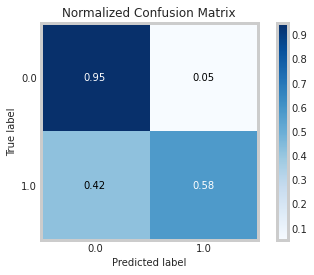

In [176]:
#Print normalized confusion matrix.
!pip install scikit-plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(testY, predY, normalize=True)

In [177]:
#Print regular confusion matrix.
data = {'yActual': testY, 'yPredicted': predY}
df = pd.DataFrame(data, columns=['yActual','yPredicted'])
confusionMatrix = pd.crosstab(df['yActual'], df['yPredicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusionMatrix)

Predicted    0.0   1.0
Actual                
0.0        31336  1667
1.0         4072  5535


#### Now, for the prediction: datasetMedian first and then datasetMean